In [155]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import re

In [156]:
# Mode + Dimension

q = 4
d = 2

# Load data

data = []

names = []

for file in os.listdir("/home/lme/crissy_t/plots1"):
    if (file.__contains__ (f"_{q}_") or file.__contains__(f"_{q}")) and file.__contains__ (".dat") and  file.__contains__ (f"{d}D") and file.__contains__("COMPLETE"):
        data.append(np.loadtxt("/home/lme/crissy_t/plots1/"+file))
        match = re.search(r'_(\d+_\d+)\.dat', file)
        names.append(match.group(1))

print(len(data))
        

20


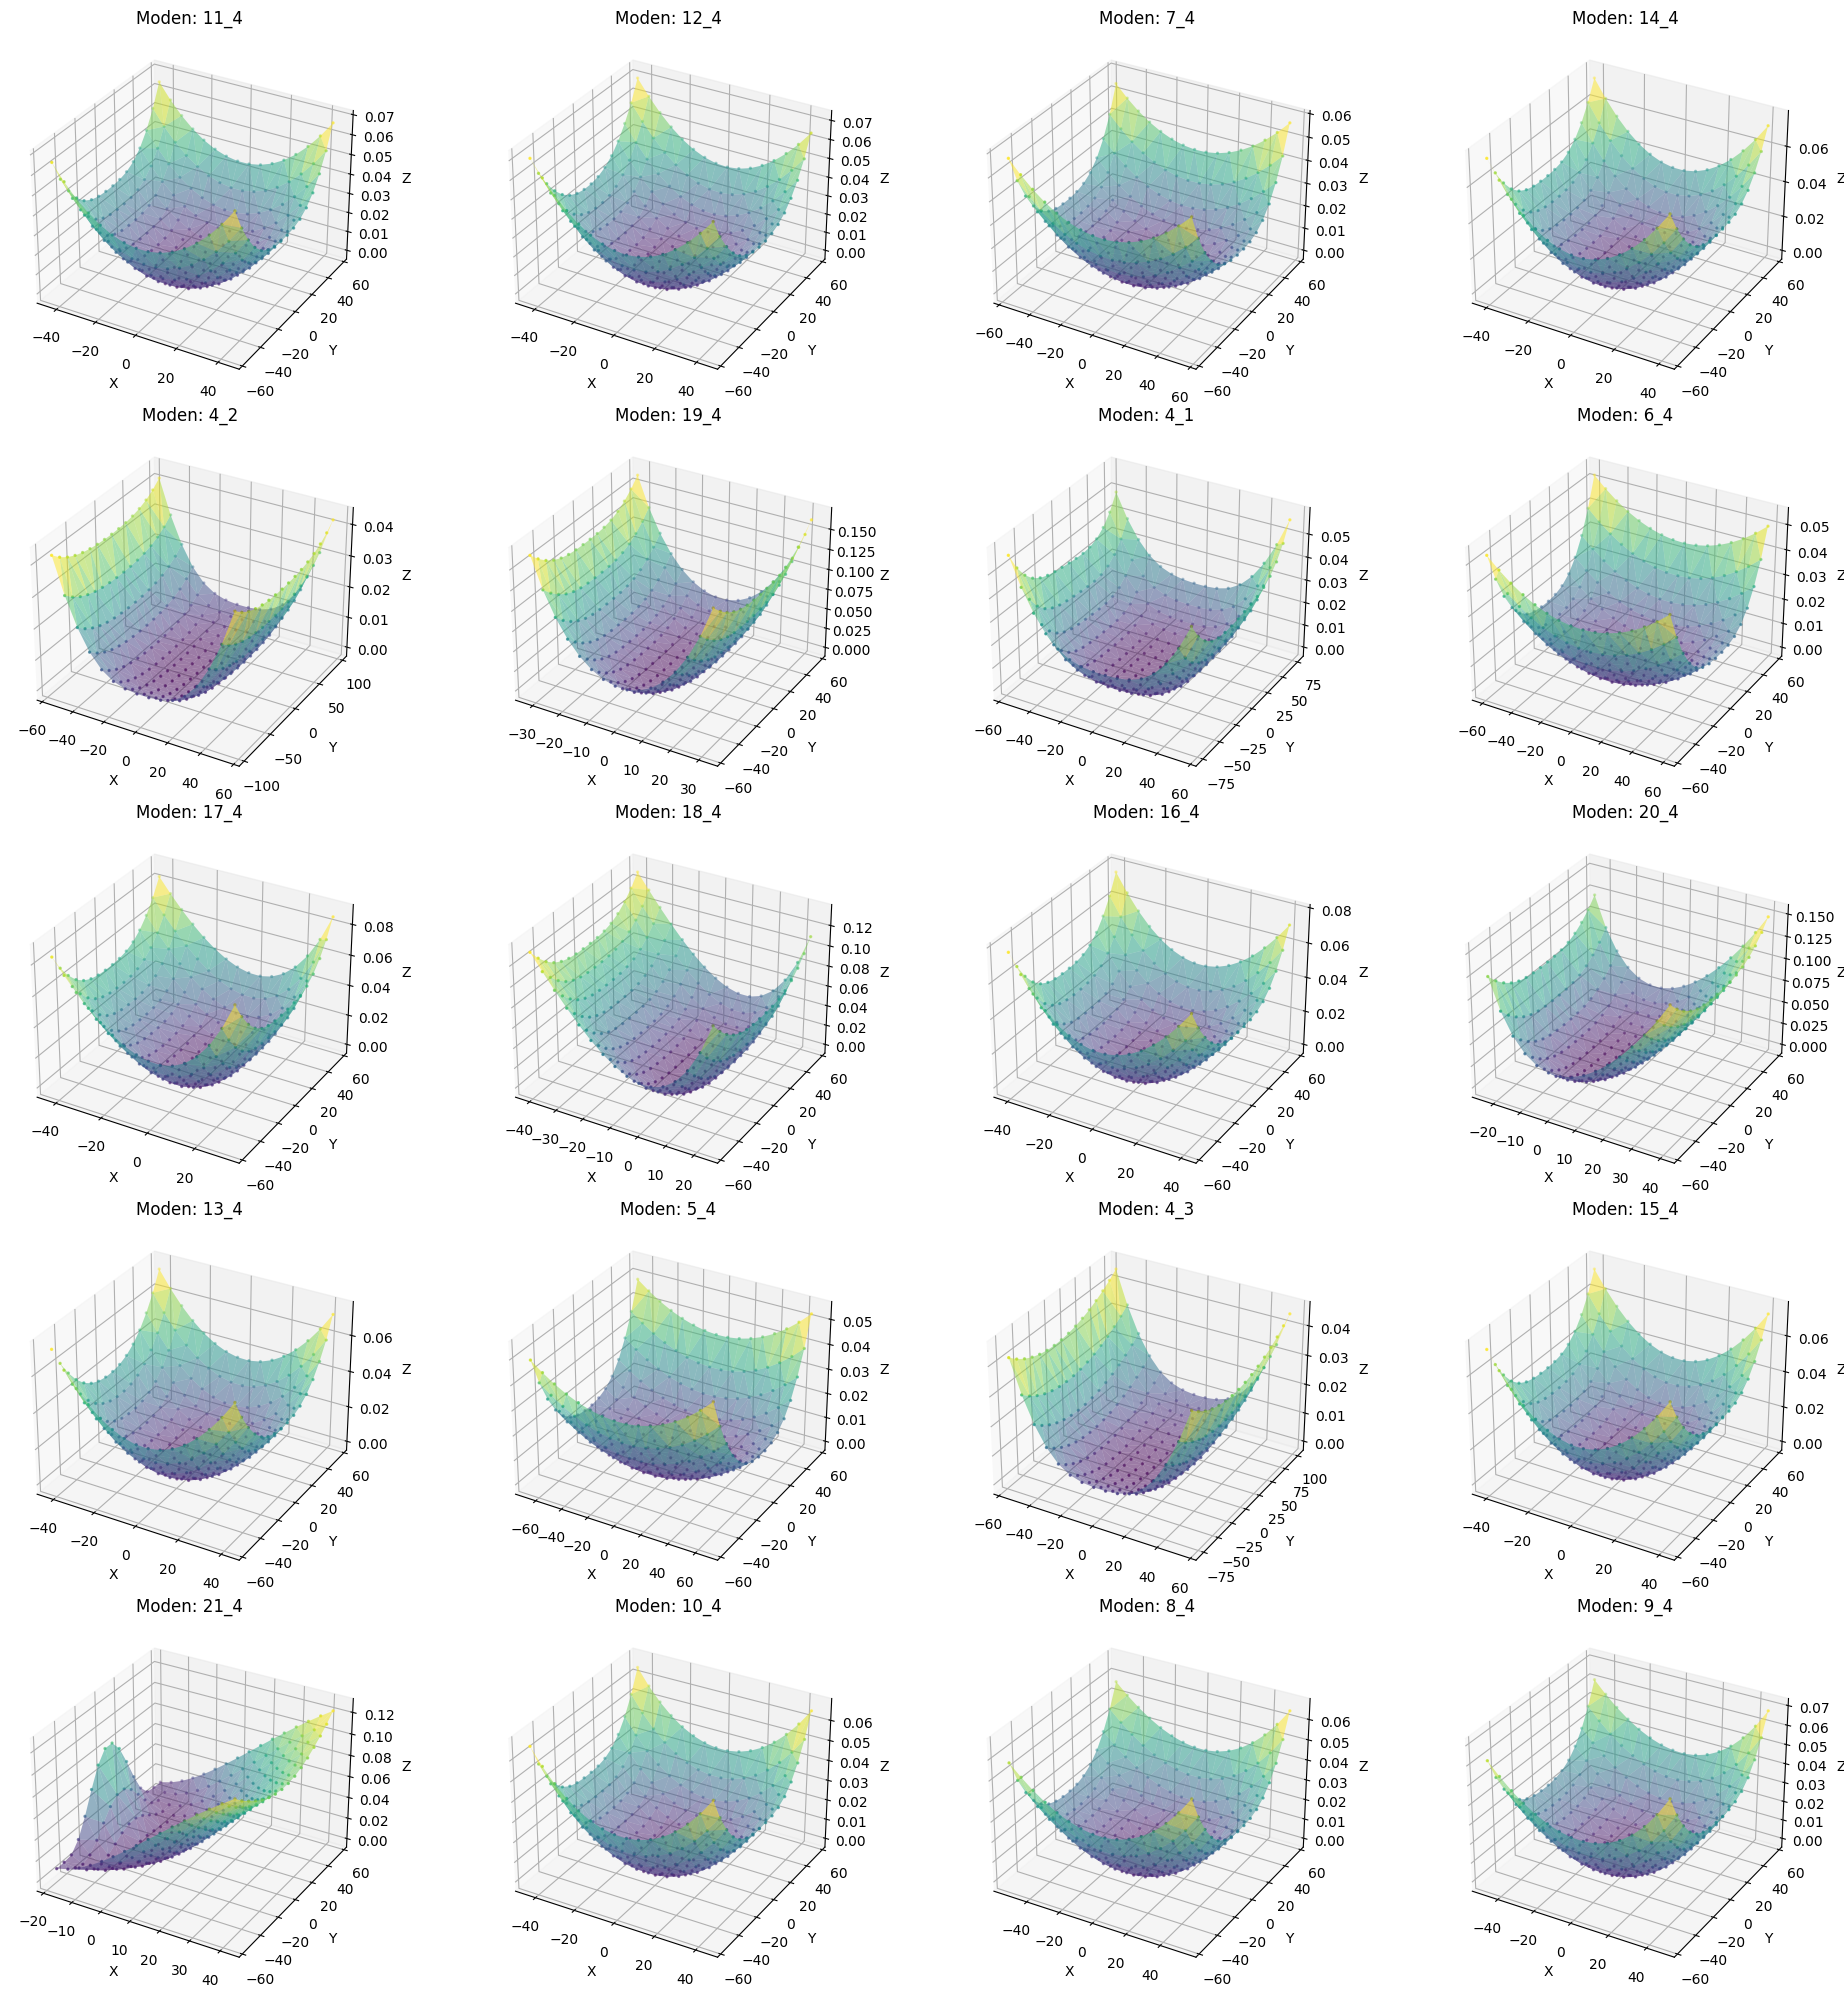

<Figure size 640x480 with 0 Axes>

In [157]:
fig = plt.figure(figsize=(20, 20))

# Create subplots
for i, array in enumerate(data):
    ax = fig.add_subplot(5, 4, i+1, projection='3d')
    ax.scatter(array[:, 0], array[:, 1], array[:, 2], c=array[:, 2], cmap='viridis', s=2)
    ax.plot_trisurf(array[:, 0], array[:, 1], array[:, 2], cmap='viridis', alpha=0.5, antialiased=True)
    # Turn on for additional colorbar
    #fig.colorbar(ax.scatter(array[:, 0], array[:, 1], array[:, 2], c=array[:, 2], cmap='viridis'), ax=ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Moden: {names[i]}')

plt.tight_layout()
plt.show()
plt.savefig(f"Mode_{q}with_{d}D.png")

# Visualization and Projection

Inspect one specific Surface and Visualize the Projection of the Surface

In [158]:
# Verfügbare Moden
print(names)

# Name des Modus, den Sie auswählen möchten
select_name = '21_4'  # Ändern Sie dies auf den gewünschten Namen

# Überprüfen, ob der Name in der Liste enthalten ist
if select_name in names:
    select_index = names.index(select_name)
    selected_array = data[select_index]
    print(f"Selected mode: {select_name}")
else:
    print(f"Name '{select_name}' is not in the list. Please select a valid name.")

['11_4', '12_4', '7_4', '14_4', '4_2', '19_4', '4_1', '6_4', '17_4', '18_4', '16_4', '20_4', '13_4', '5_4', '4_3', '15_4', '21_4', '10_4', '8_4', '9_4']
Selected mode: 21_4


In [159]:
import plotly.graph_objects as go
import plotly.io as pio
from scipy.spatial import Delaunay
pio.renderers.default = "vscode"

In [161]:
# select x,y,z data

x = selected_array[:, 0]
y = selected_array[:, 1]
z = selected_array[:, 2]

trace1 = go.Scatter3d(x=x, y=y, z=z, mode="markers", marker=dict(size=2, color=z, colorscale='Viridis', opacity=0.8))
# Delaunay-Triangulation für das Trisurf-Mesh
tri = Delaunay(np.array([x, y]).T)
i, j, k = tri.simplices.T

trace2 = go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, intensity=z, colorscale="Viridis", opacity=0.5)


# Deactivate if you dont want to see points
# x = min
trace_yz = go.Scatter3d(x=np.full_like(x, np.min(x)), y=y, z=z, mode="markers", marker=dict(color='black', size=1))

# y = min
trace_xz = go.Scatter3d(x=x, y=np.full_like(y, np.min(y)), z=z, mode="markers", marker=dict(color='black',size=1))


# Combine all the traces
data = [trace1, trace2, trace_yz, trace_xz]
layout = go.Layout(
    title=f"Mode: {select}",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    margin=dict(l=0, r=0, b=0, t=40)  
)

fig = go.Figure(data=data, layout=layout)
fig.show()

# Projections

Show the Projections of the surface and visualize min and max